# Data Resources
We get stock prices of Lo'real Group from YahooFinance via a Python library called: yfinance.

After getting the data, save it to a csv for further analysis.

In [1]:
# -*- coding: utf-8 -*-
# import libraries

import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mplfinance as mpf

In [2]:
# Get data on L'Oreal from Yahoo Finance for 5 years
loreal = yf.Ticker("OR.PA")
df = loreal.history(period="5y")

In [3]:
# Export raw data to csv
path = '../Data/loreal_stock_price.csv'
df.to_csv(path)

# Data Overview

## Line Plot of Close Price with SMA

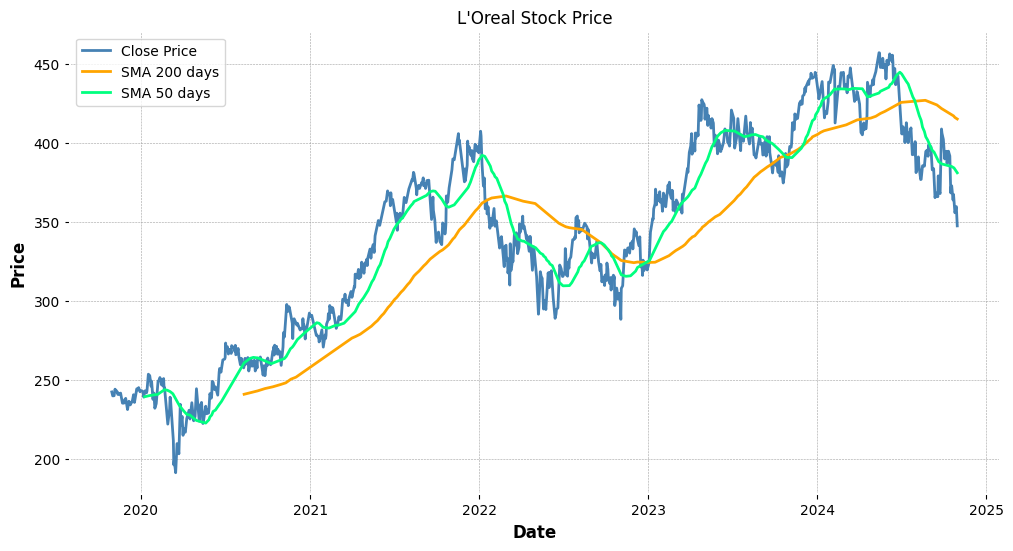

In [28]:
# Plot the data
df['SMA_50'] = df['Close'].rolling(window=50).mean() # mid-term trend
df['SMA_200'] = df['Close'].rolling(window=200).mean() # long-term trend

plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], label='Close Price', color='steelblue')
# simple running average
plt.plot(df.index, df['SMA_200'], label='SMA 200 days', color='orange')
plt.plot(df.index, df['SMA_50'], label='SMA 50 days', color='springgreen')

plt.title('L\'Oreal Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()


### Conclusion: 
### Long-Term Trend (200 Days SMA)
**Fluctuating Upward Trend:** Over the past 200 days, L'Oréal's stock price has generally been on an upward trend, despite some fluctuations. This indicates overall positive growth and investor confidence in the company's performance.

**Slight Recession in 2 Years:** Historically, there's a pattern of a slight recession every two years. This could be due to market cycles, economic factors, or company-specific events.

### Mid-Term Trend (50 Days SMA)
**General Upward Trend:** Similar to the long-term trend, the mid-term trend also shows an upward trajectory, but with more frequent short-term fluctuations. These fluctuations could be influenced by quarterly earnings reports, market sentiment, or industry trends.

**Short-Term Fluctuations:** Monthly or quarterly variations are common and can be attributed to factors like product launches, marketing campaigns, or changes in consumer demand.

## Candlestick Chart of Stock Price by month

In [5]:
# Resample the data to monthly
stock_price_by_month = df.resample('M').agg({'Open': 'first', 
                                       'High': 'max', 
                                       'Low': 'min', 
                                       'Close': 'last', 
                                       'Volume': 'sum'})

# Prepare the data for mplfinance
stock_price_by_month.index = pd.to_datetime(stock_price_by_month.index)

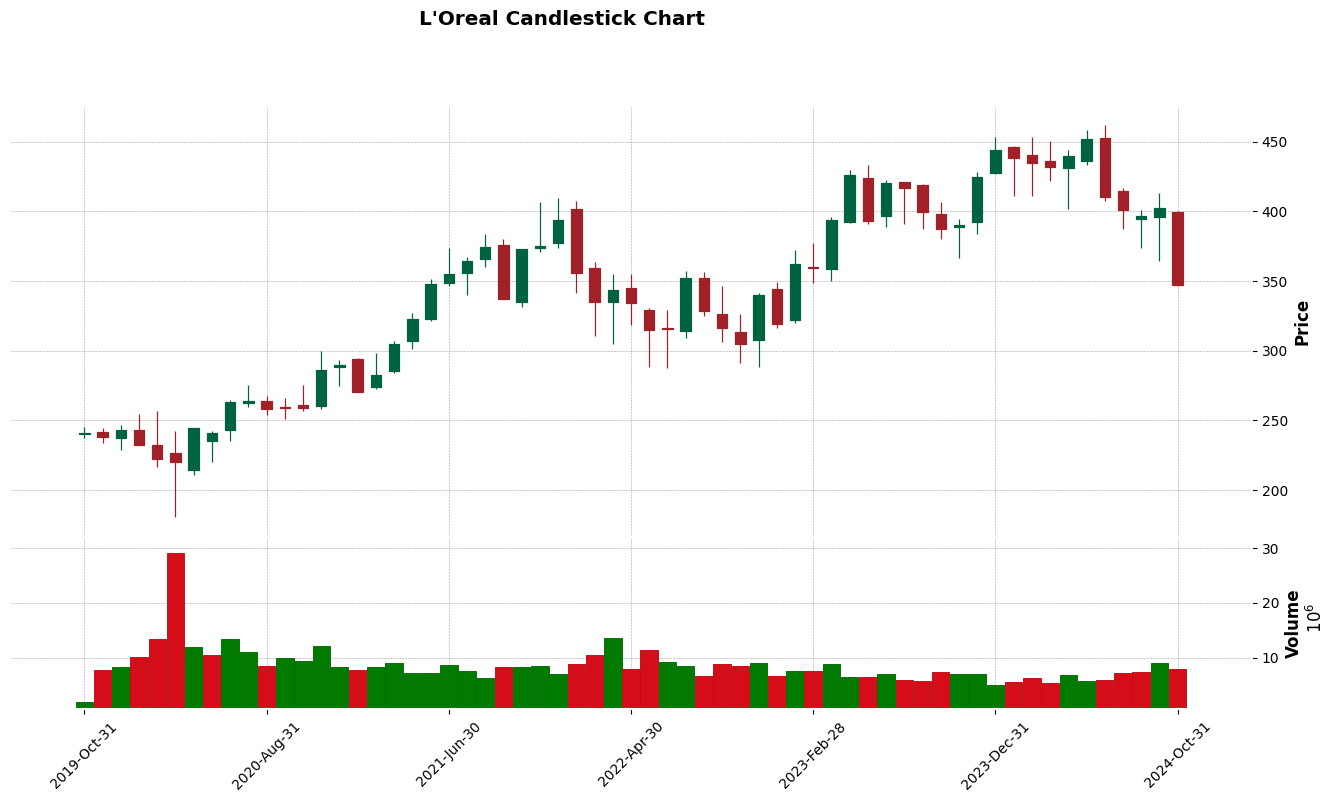

In [6]:
mpf.plot(stock_price_by_month, type='candle', volume=True, title='L\'Oreal Candlestick Chart', ylabel='Price', ylabel_lower='Volume', style='charles', figratio=(12, 6), figscale=1.5)

<style>
blue {
  color: #37AFE1;
}

red {
  color: red;
}

green {
  color: forestgreen;
}
</style>

### Conclusion: 
The candlestick Stock Price chart delivers some insights to us:
1.  **<blue>Panic Selling Point (Early 2020): </blue>**
  - **Observation:** Around early 2020, there’s a sharp decline in L'Oréal’s stock price, with several consecutive red (downward) candlesticks and a noticeable increase in trading volume, which can be expressed as investors' fear. This suggests a period of panic selling, where many investors sold off shares rapidly.
  - **Potential Cause:** This time frame aligns with the onset of the COVID-19 pandemic, which caused widespread fear and uncertainty across global markets. Companies in the consumer sector, especially non-essential items like beauty products, saw significant drops as investors anticipated reduced consumer spending.
  
2.  **<blue>Strong Growth Phase (Mid 2020 - Early 2022): </blue>**
  - **Observation:** From mid 2020 until around early 2022, L'Oréal’s stock price began a sustained upward rally, with many large green (upward) candlesticks, indicating steady growth in price. Some candlesticks have long wicks, which indicates that the price fluctuated significantly within short trading periods.
  - **Potential Cause:** As economies adjusted to the pandemic and consumer spending began to recover, demand for cosmetics and personal care products likely rebounded. Additionally, low-interest rates and government stimulus measures during this period may have boosted  investor confidence in the market. Still, the price's slight votality may be caused by the uncertain financial circumstances at that particular time.

3.  **<blue>Stabilization Phase (2022 - Early 2024): </blue>**
  - **Observation:** Starting around 2022, the chart shows smaller candlesticks with lower trading volumes, reflecting a period of reduced volatility and relatively stable prices.
  - **Potential Cause:** This could indicate that investors had reached a consensus on L'Oréal's valuation during this period. The company may have been delivering steady but unspectacular results, or investors could have been waiting for a clearer direction in the post-pandemic economy.

4.  **<blue>Recent Sharp Decline (Late 2024): </blue>**
  - **Observation:** Towards the end of the chart (late 2024), there’s a noticeable drop in stock price, represented by large red candlesticks. This recent decline is accompanied by a spike in trading volume, indicating moderate selling activity.
  - **Potential Cause:** This trend could be possibly caused by the decreasing trend in the global cosmetic market, mostly caused by the current deterioration of Chinese market and the frequent occurrences of bad weather.

5.  **<blue>Volume Spikes and Their Implications: </blue>**

  - Generally, the volume bars beneath the candlesticks remain stable, indicating consistent trading activity. However, a notable exception occurred during the early months of 2020. During this period, a significant spike in volume was observed as investors rushed to sell their shares. This surge in trading activity was a reaction to the unprecedented economic and social uncertainties brought about by the global events at that time, such as the onset of the COVID-19 pandemic.

  - This heightened sell-off reflects widespread investor panic and the drive to liquidate assets in response to rapidly changing market conditions. Such behavior highlights the market's sensitivity to external shocks and the immediate impact these shocks can have on trading volumes and stock prices.

---

**Summary**

L'Oréal's stock saw a sharp decline in early 2020 due to COVID-19-induced panic selling, followed by a strong growth phase from mid-2020 to early 2022 as markets recovered. A stabilization period from 2022 to early 2024 saw reduced volatility, while a recent sharp decline in late 2024 reflects broader market issues. Volume spikes aligned with these price movements underscore significant investor reactions to global events.

# Statistics Measures Calculation
Here we pay attention to daily close price of stock. Find out the statistics measures of the stock close price per year for the 5 closest years.


In [7]:
df['Close'].describe()
mean_close_price = df['Close'].mean()
med_close_price = df['Close'].median()

print (f"Mean close price: {mean_close_price}")
print (f"Median close price: {med_close_price}")

Mean close price: 341.3094456535369
Median close price: 347.1460876464844


In [8]:
descriptive_stats = df.groupby(df.index.year)['Close'].mean()
descriptive_stats = descriptive_stats.to_frame()
descriptive_stats.columns = ['Mean Close Price']
descriptive_stats['Count'] = df.groupby(df.index.year)['Close'].count()
descriptive_stats['Median Close Price'] = df.groupby(df.index.year)['Close'].median()
descriptive_stats['Mode Close Price'] = df.groupby(df.index.year)['Close'].agg(lambda x: x.value_counts().index[0])
descriptive_stats['Standard Deviation Close Price'] = df.groupby(df.index.year)['Close'].std()
descriptive_stats['Variance Close Price'] = df.groupby(df.index.year)['Close'].var()
descriptive_stats['Range Close Price'] = df.groupby(df.index.year)['Close'].agg(lambda x: x.max() - x.min())
descriptive_stats['Skewness Close Price'] = df.groupby(df.index.year)['Close'].skew()

descriptive_stats

,Mean Close Price,Count,Median Close Price,Mode Close Price,Standard Deviation Close Price,Variance Close Price,Range Close Price,Skewness Close Price
Date,,,,,,,,
2019,238.918842,44,239.835503,241.446991,3.902119,15.226532,13.904892,-0.308880
2020,253.369124,257,257.495972,267.851837,21.995001,483.780077,106.444611,-0.207561
2021,343.242290,258,351.582718,288.096985,37.735502,1423.968132,135.068878,-0.341978
2022,329.318243,257,328.974579,335.252014,19.846969,393.902195,119.003357,0.688661
2023,395.210089,255,398.274811,392.168762,23.851426,568.890506,121.669800,-0.293520
2024,415.815289,214,419.744659,452.100006,27.643990,764.190189,109.549988,-0.403596


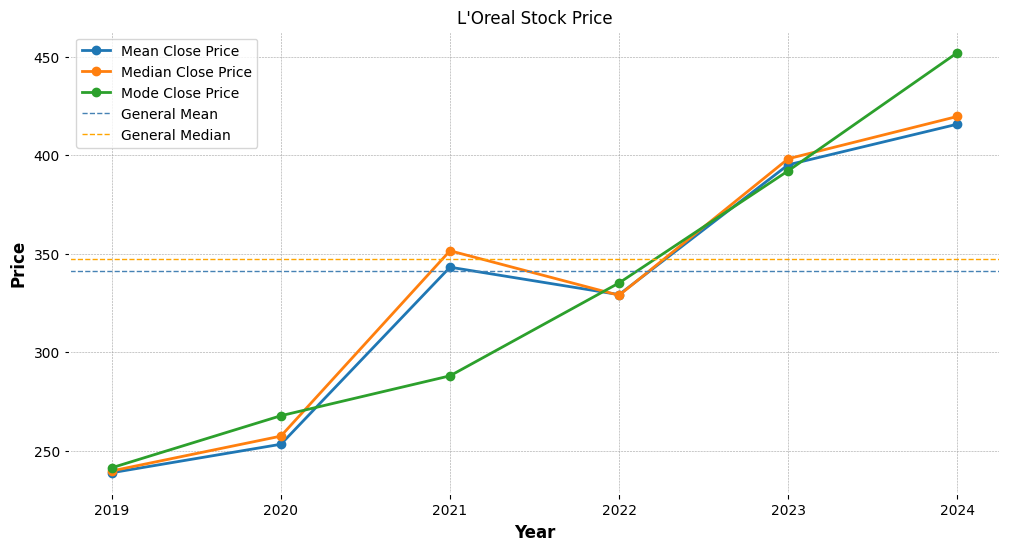

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(descriptive_stats.index, descriptive_stats['Mean Close Price'], label='Mean Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Median Close Price'], label='Median Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Mode Close Price'], label='Mode Close Price', marker='o')
plt.axhline(y=mean_close_price, color='steelblue', linestyle='--', linewidth=1, label='General Mean')
plt.axhline(y=med_close_price, color='orange', linestyle='--', linewidth=1, label='General Median')
plt.title('L\'Oreal Stock Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

## Draft - Viz Conclusion
This chart displays L'Oréal's mean, median, and mode closing stock prices over time, along with general mean and median reference lines. Here are some key insights:

1. Overall Upward Trend (2019 - 2024):
Both the mean, median, and mode closing prices show an upward trajectory, indicating that L'Oréal’s stock price has generally increased over this period.
This suggests that the company's valuation has been growing, potentially due to expanding revenue, improved profitability, or positive investor sentiment.
2. Yearly Variations in Price Measures:
2020 Spike: There's a noticeable increase in prices from 2019 to 2020, which may reflect L'Oréal’s recovery post-COVID-19 panic selling, as investors regained confidence.
Flattening Around 2022: Both the mean and median prices dip slightly in 2022 before recovering. This could indicate a temporary slowdown or consolidation period, where the stock stabilized or faced minor challenges.
2023 - 2024 Increase: From 2023 onwards, there’s a notable rise in all measures, especially the mode, suggesting increased demand or growth in stock value during this period.
3. Relationship Between Mean, Median, and Mode:
In most years, the mean and median prices are close, indicating a balanced distribution of prices without significant outliers.
The mode line occasionally diverges, such as in 2024, where it shows a sharper increase than the mean and median. This suggests frequent trading at higher prices, possibly reflecting strong market demand or bullish sentiment among investors.
4. Reference Lines (General Mean and Median):
Both the general mean and median lines (dashed) remain around the 350 level. This can be seen as a benchmark level for L'Oréal's typical stock performance across the time range.
The steady rise above these reference lines in recent years (2023 and 2024) indicates that the stock is consistently trading at levels higher than its historical average, a positive sign for long-term growth.
Summary:
This chart suggests a strong upward trend in L'Oréal’s stock price from 2019 to 2024, with temporary fluctuations but an overall increase in value. The divergence of the mode in recent years indicates potential bullish sentiment, while prices above the general mean and median reference lines signal sustained positive performance.

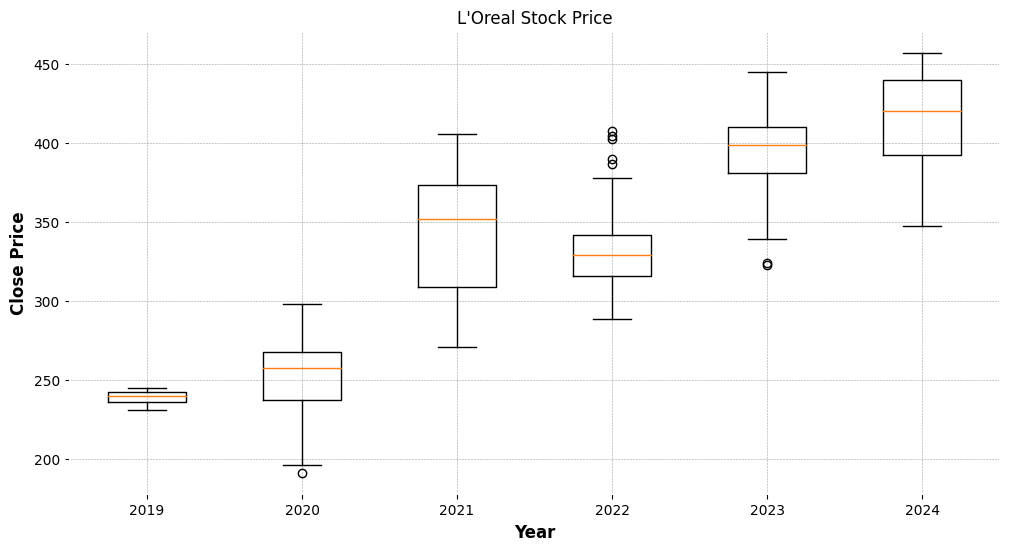

In [14]:
years = [2019, 2020, 2021, 2022, 2023, 2024]
def extract_data_by_year(year):
    year_df = df['Close'][df.index.year == year]
    year_df.reset_index(drop=True, inplace=True)
    year_df = year_df.to_frame()
    year_df.columns = [year]
    return year_df
close_price_2019 = extract_data_by_year(2019)
close_price_2020 = extract_data_by_year(2020)
close_price_2021 = extract_data_by_year(2021)
close_price_2022 = extract_data_by_year(2022)
close_price_2023 = extract_data_by_year(2023)
close_price_2024 = extract_data_by_year(2024)

plt.figure(figsize=(12, 6))
plt.boxplot([close_price_2019[2019], close_price_2020[2020], close_price_2021[2021], close_price_2022[2022], close_price_2023[2023], close_price_2024[2024]], labels=years)
plt.title('L\'Oreal Stock Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()


## Draft - Conclusion
This box plot provides additional insights into L'Oréal’s stock price distribution across each year and can be combined with the previous line chart analysis to gain a fuller understanding. Here are the key observations:

### 1. **2019 (Partial Year - November Onward):**
   - **Observation:** The stock price shows minimal variation, with a relatively narrow interquartile range (IQR) and closely grouped data points.
   - **Interpretation:** This limited variation could indicate stable trading, likely because this data only covers a short period. This stability could be due to a lack of major events affecting L'Oréal in the last months of 2019.

### 2. **2020 - Pandemic Impact and Panic Selling:**
   - **Observation:** The box for 2020 has a wider range, with a noticeable drop in the lower whisker and an outlier below 200, reflecting high volatility and panic selling. This year also has the lowest median closing price across the years.
   - **Interpretation:** The COVID-19 pandemic's early months saw a sharp decline in stock prices, likely due to investor fears about reduced consumer spending and economic contraction. This matches the sharp decline seen in the candlestick chart, where investors sold off shares, reflecting broader market anxieties.

### 3. **2021 - Strong Recovery and Growth:**
   - **Observation:** The 2021 box shows a significant rise in the median and a broad range from about 300 to 400, with several outliers at the higher end.
   - **Interpretation:** This represents L'Oréal's strong recovery from the pandemic, with increased investor confidence. The higher median and wide spread indicate that the stock was actively growing but with variability, as investors evaluated the company's post-pandemic trajectory.

### 4. **2022 - Consolidation Phase:**
   - **Observation:** In 2022, the IQR and overall range narrowed, indicating reduced volatility, and the median stayed around the middle of the 300 range.
   - **Interpretation:** This matches the stability phase observed in the previous chart. The narrower range suggests a period where the stock price found relative equilibrium as investors held a consistent valuation for L'Oréal. This likely represents a consolidation phase, as the stock price stabilized post-recovery and investors awaited further economic or company-specific news.

### 5. **2023 - Steady Growth with Minor Volatility:**
   - **Observation:** The median price increased again in 2023, with a wider IQR but fewer extreme outliers.
   - **Interpretation:** This indicates that L'Oréal was experiencing steady growth, with a rise in investor optimism, though there was still some variability. The outliers in the lower range may represent brief dips or corrections, which could be due to short-term market fluctuations or external factors.

### 6. **2024 - Continued Uptrend:**
   - **Observation:** In 2024, the median price and the IQR have both increased compared to previous years, reaching a level above the overall average reference line from the earlier chart.
   - **Interpretation:** This upward trend suggests that L'Oréal continued to perform well, with investor sentiment remaining bullish. The higher median and broad IQR indicate continued growth potential, likely fueled by consistent demand and possibly new strategic initiatives or market trends favoring the company's products.

### Summary:
Combining insights from both charts, L'Oréal’s stock experienced significant fluctuations due to the pandemic, a strong post-recovery rally, and a phase of consolidation. The recent years show a consistent uptrend, with 2024 exhibiting increased investor confidence. The combination of high medians, broader price ranges, and minimal downside outliers in 2024 suggests a positive outlook, with investors increasingly valuing L'Oréal's long-term growth prospects.